In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
num=[]

for i in df.select_dtypes(exclude='object'):
    num.append(i)


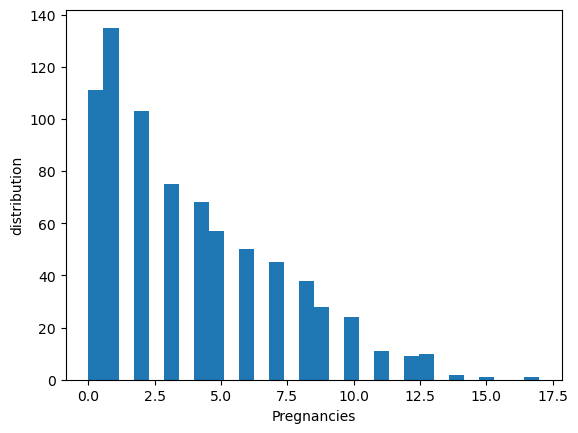

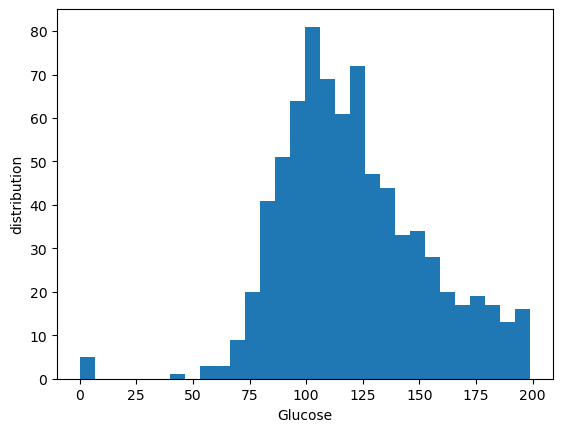

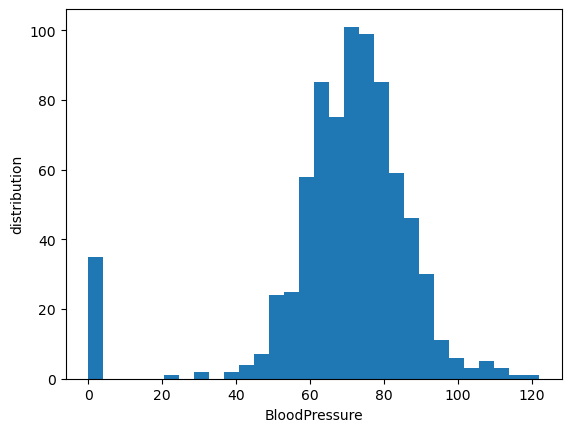

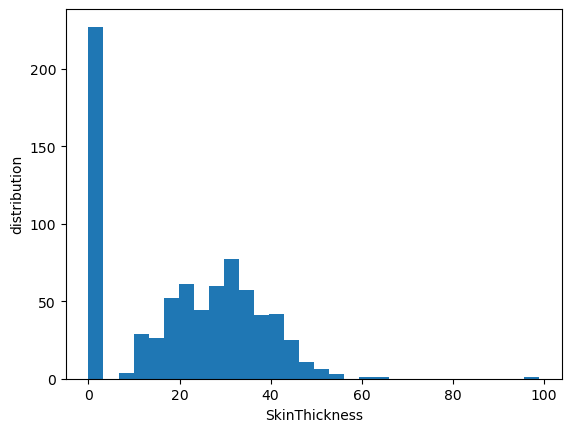

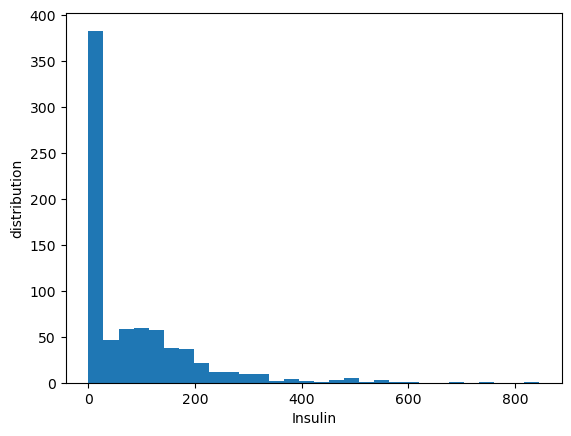

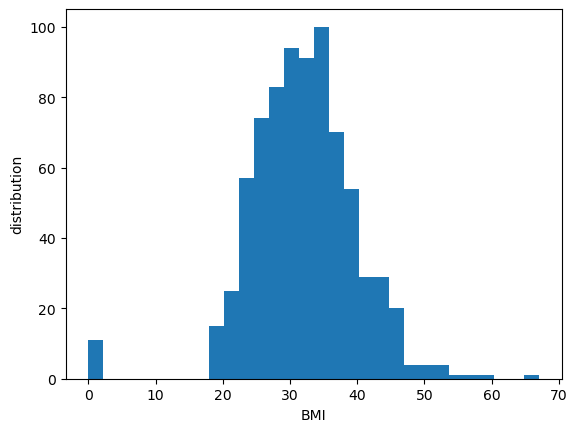

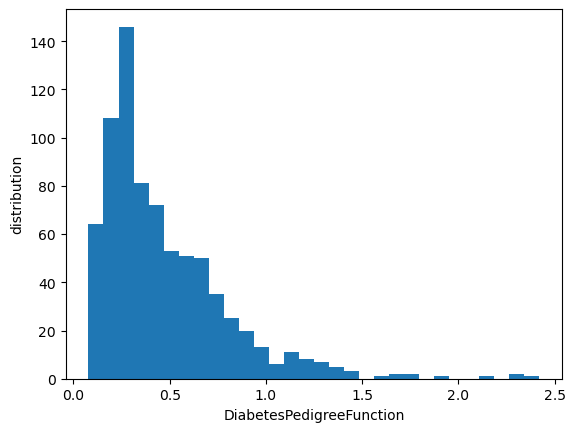

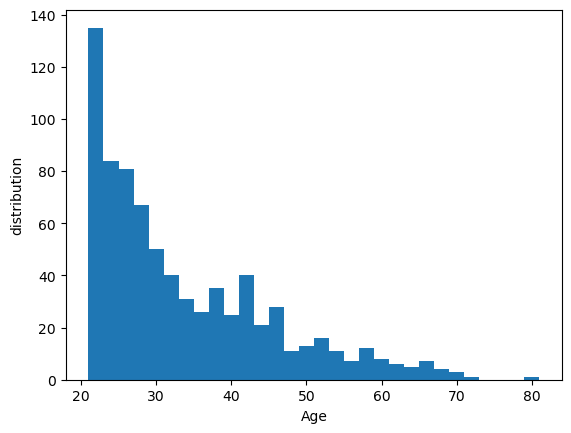

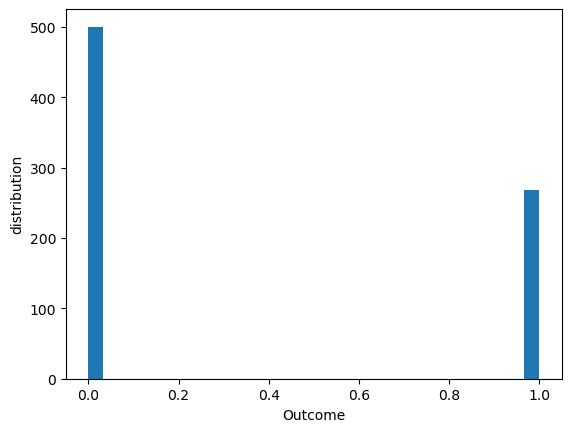

In [10]:
for i in num:
    plt.hist(df[i],bins=30)
    plt.xlabel(i)
    plt.ylabel('distribution')
    plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

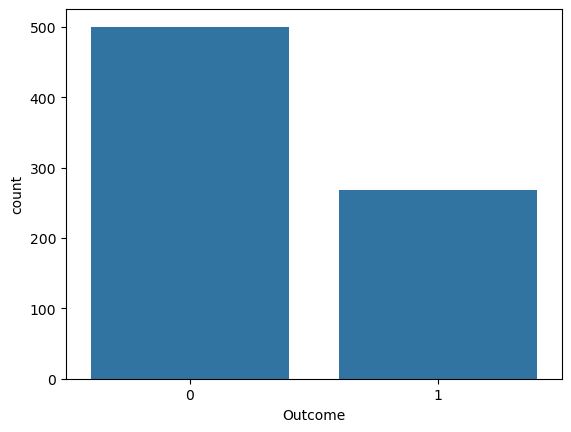

In [21]:
sns.barplot(df['Outcome'].value_counts())

<Axes: >

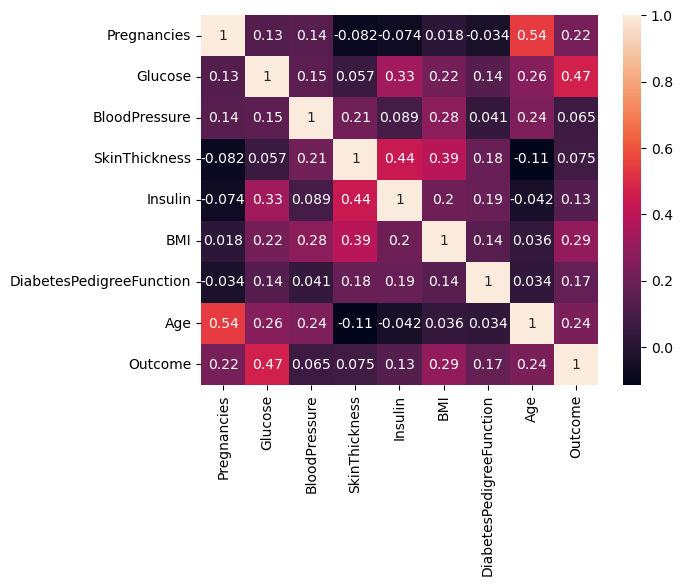

In [14]:
sns.heatmap(df.corr(),annot=True)

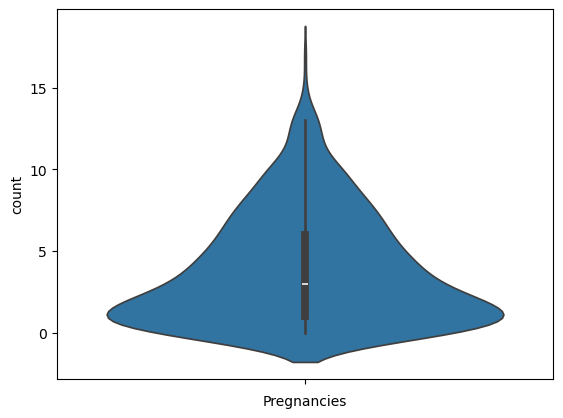

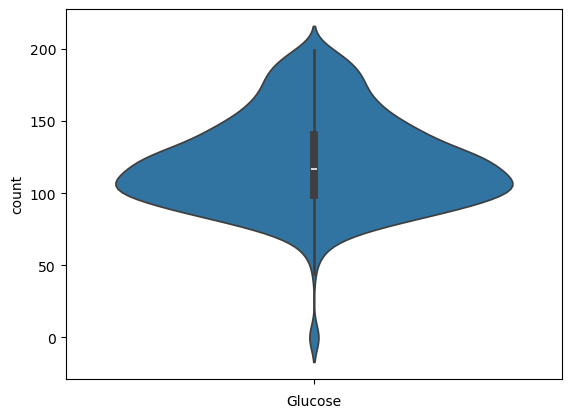

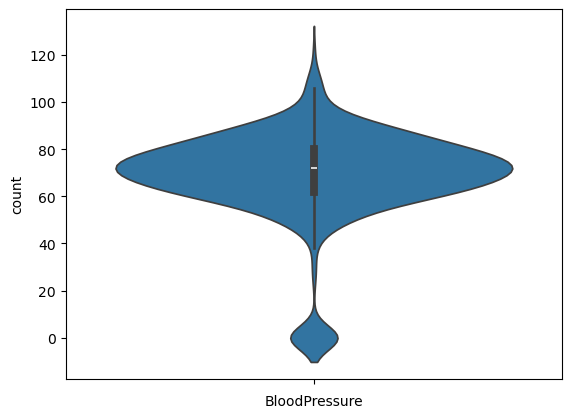

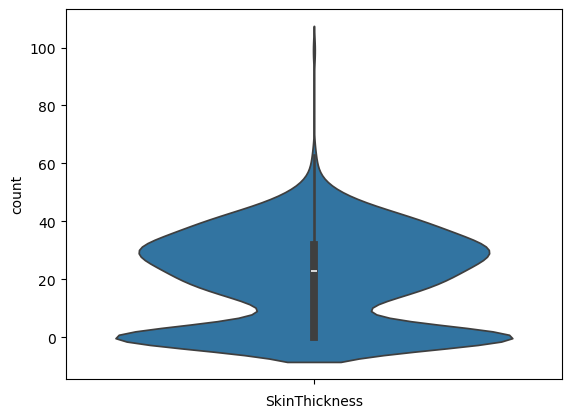

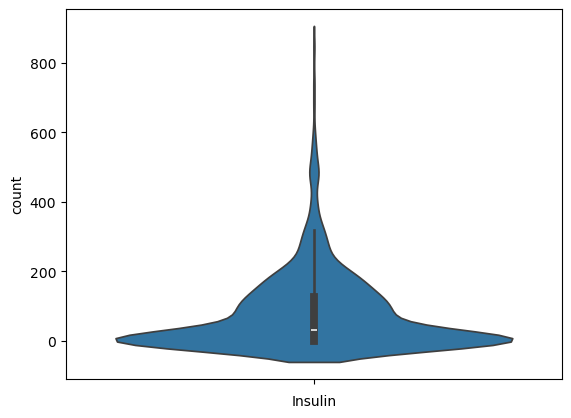

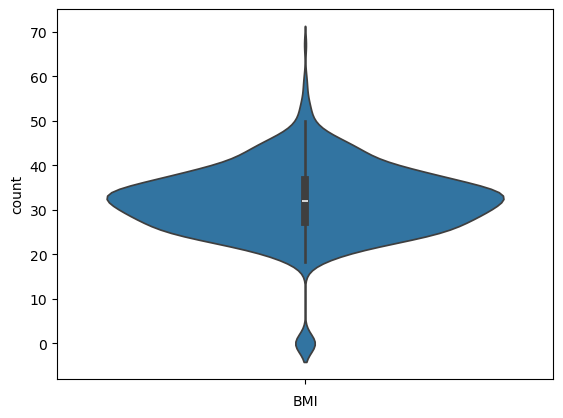

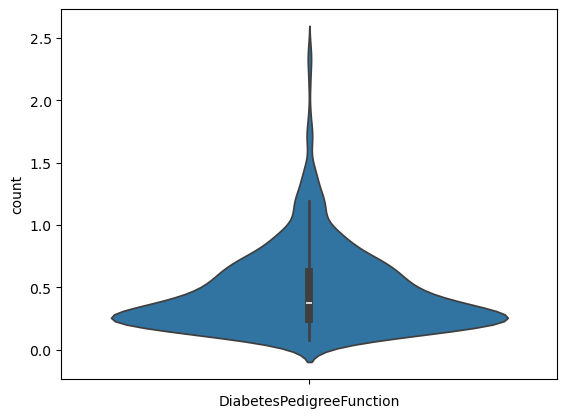

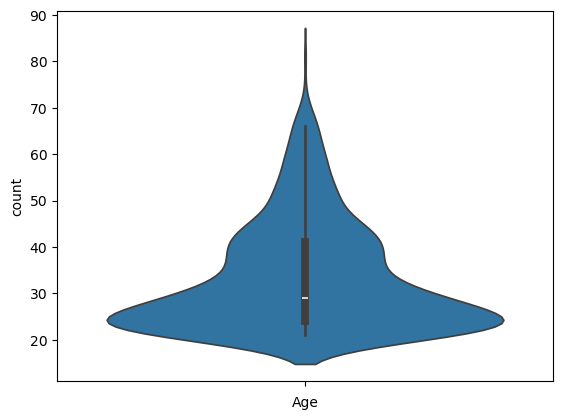

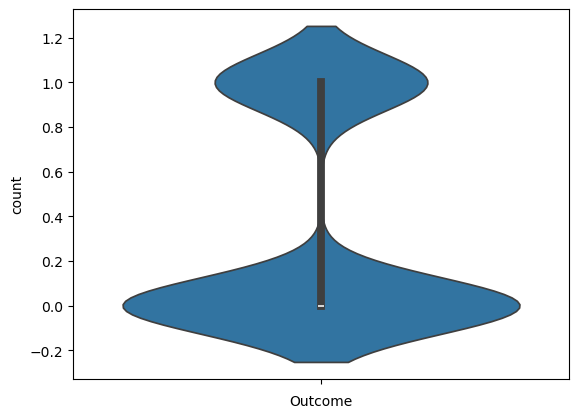

In [16]:
for i in num:
    sns.violinplot(df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

In [26]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=2)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-0.24864315, -0.48940393,  0.12781322, ..., -0.79714106,
        -0.78484458, -0.53298848],
       [-0.24864315, -0.26880004, -1.30462805, ..., -1.2223427 ,
        -0.98457818, -0.95887985],
       [ 0.344238  ,  0.80270457,  0.43476492, ...,  0.19082747,
        -0.7520525 ,  2.70378593],
       ...,
       [-0.54508373, -0.36334457,  0.23013046, ...,  0.02825037,
         0.67887478, -0.53298848],
       [-0.54508373, -1.27727497,  0.12781322, ..., -0.25938604,
         0.22872891, -0.70334503],
       [ 2.71576261, -0.48940393,  0.12781322, ...,  0.55349946,
        -0.87129644,  1.00022045]])

In [43]:
import ubml
metrics_performance,best_model=ubml.model_train_test(mode='classification',x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)


In [44]:
print(best_model)
metrics_performance

SVM Classifier


,accuracy score train,accuracy score test,f1 score train,f1 score test,recall score train,recall score test,jaccard score train,jaccard score test,precision score train,precision score test
Logistic Regression,0.785,0.753,0.654,0.596,0.584,0.519,0.486,0.424,0.744,0.700
KNN Classifier,0.798,0.727,0.692,0.533,0.650,0.444,0.529,0.364,0.739,0.667
SVM Classifier,0.764,0.786,0.596,0.612,0.500,0.481,0.425,0.441,0.738,0.839
Naive Bayes Classifier,0.756,0.773,0.636,0.639,0.612,0.574,0.466,0.470,0.662,0.721
Decision Tree Classifier,1.000,0.682,1.000,0.484,1.000,0.426,1.000,0.319,1.000,0.561
Random Forest Classifier,1.000,0.753,1.000,0.612,1.000,0.556,1.000,0.441,1.000,0.682


In [45]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [46]:
ypred=svc.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy = accuracy_score(y_test,ypred)
accuracy

cn=classification_report(y_test,ypred)
print(cn)

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       100
           1       0.84      0.48      0.61        54

    accuracy                           0.79       154
   macro avg       0.81      0.72      0.73       154
weighted avg       0.80      0.79      0.77       154



In [70]:
input_data1 = (4,110,92,0,0,37.6,0.191,30)  #not diabetic 
input_data2 = (6,148,72,35,0,33.6,0.627,50)  # diabetic


input_data_as_numpy_array = np.asarray(input_data1)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = svc.predict(input_data_reshaped)
 

print(prediction)
if (prediction==1):
  print('The person is  diabetic')
else:
  print('The person is not diabetic')

[0]
The person is not diabetic
